## Optical Elements Part II

In [5]:
## just for plotting later

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spectrumRGB import wavelength_to_rgb
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

### Prisms

Prisms are wedge shaped optical elements made of a transparent material as for example of glass. A special form of such a prism is an isosceles prims with two sides of equal length. The two equal sides enclose an angle $\gamma$. When light is coupled into that prism light is refracted twice. First the incendent angle $\alpha_1$ is changed into a refracted angle $\beta_1$. This refracted ray then hits the second interface under an angle $\beta_2$ leading again to a refraction into the outgoing angle $\alpha_2$. What is now interesting, is the total deflection of the incident ray, which is measured by the angle $\delta$.

<center>
    
|<img src="img/prism.png" width="40%">|
|-|
| **Fig.:** Refraction of rays on a prism. |
    
</center>    

#### Deflection angle

We can calculate the deflection angle $\delta$ from a number of considerations. First consider the following relations between the angles in the prims and Snells law

$$\beta_1=\sin^{-1}\left (\frac{n_0}{n_1}\sin(\alpha_1) \right)$$
$$\beta_2=\gamma-\beta_1$$
$$\alpha_2=\sin^{-1}\left (\frac{n_1}{n_0}\sin(\beta_2)\right )$$
$$\theta_2=\alpha_2-\gamma$$

where $\theta_2$ is the angle between the incident surface normal and the outgoing ray. The total deflection angle $\delta$ is then 

$$\delta =\alpha_1-\beta_1+\alpha_2-\beta_2$$

or

$$\delta =\alpha_1+\alpha_2-\gamma$$

from which we obtain

$$\delta=\alpha_1+\sin^{-1}\left (\frac{n_1}{n_0}\sin\left [\gamma-\sin^{-1}\left (\frac{n_0}{n_1}\sin(\alpha_1) \right)\right]\right )$$

as the deflection angle.

In [2]:
def deflection(alpha_1,gamma,n0,n1):
    g=gamma*np.pi/180
    return(alpha_1+np.arcsin(n1*np.sin(g-np.arcsin(n0*np.sin(alpha_1)/n1))))-g

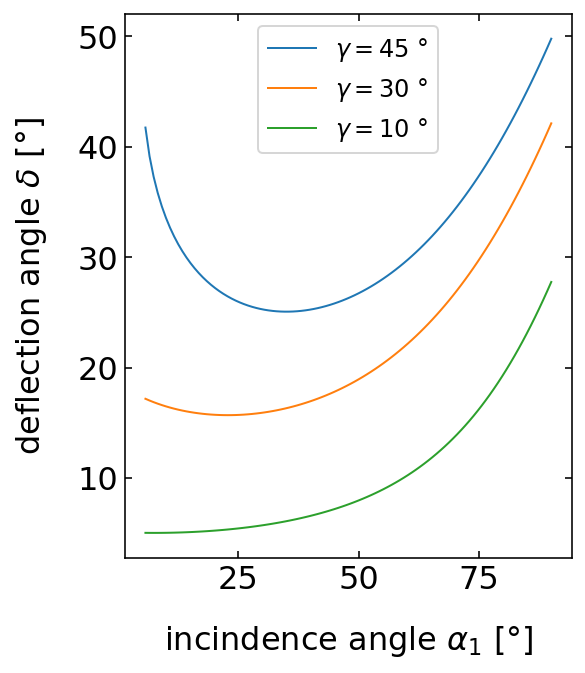

In [3]:
a_1=np.linspace(0.1,np.pi/2,100)
plt.figure(figsize=(4,5))
plt.plot(a_1*180/np.pi,deflection(a_1,45,1,1.5)*180/np.pi,label=r"$\gamma=45$ °")
plt.plot(a_1*180/np.pi,deflection(a_1,30,1,1.5)*180/np.pi,label=r"$\gamma=30$ °")
plt.plot(a_1*180/np.pi,deflection(a_1,10,1,1.5)*180/np.pi,label=r"$\gamma=10$ °")
plt.xlabel(r"incindence angle $\alpha_1$ [°]")
plt.ylabel(r"deflection angle $\delta$ [°]")
plt.legend()
plt.show()

#### Minimum deflection angle



If we now would like to know, how the deflection angle changes with the incident angle $\alpha_1$, we calculate the derivative of the deflection angle $\delta$ with respect to $\alpha_1$, i.e.

$$\frac{d\delta}{d\alpha_1}=1+\frac{d\alpha_2}{d \alpha_1}$$

We are here especially interested in the case, where this change in deflection is reaching a minimum, i.e. $d\delta/d\alpha_1 =0$. This readily yields 

$$d \alpha_2=-d\alpha_1$$

This means a change in the incidence angle $d\alpha_1$ yields an opposite change in the outgoing angle  $-d\alpha_2$. We may later observe that in the experiment.

As both, the incident and the outgoing angle are related to each other by Snells's law, we may introduce the derivatives of Snells law for both interfaces, e.g.

- $\cos(\alpha_1)d\alpha_1=n\cos(\beta_1)d\beta_1$
- $\cos(\alpha_2)d\alpha_2=n\cos(\beta_2)d\beta_2$

where $n$ is the refractive index of the prism material and the material outside is air ($n_{\rm air}=1$). Replacing $\cos(\alpha)=\sqrt{1-\sin^2(\alpha)}$ and dividing the two previous equations by each other readily yields

$$\frac{1-\sin^2(\alpha_1)}{1-\sin^2(\alpha_2)}=\frac{n^2-\sin^2(\alpha_1)}{n^2-\sin^2(\alpha_2)}$$

The latter equation is for $n\neq 1$ only satisfied if $\alpha_1=\alpha_2=\alpha$. In this case, the light path through the prism must be symmetric and we may write down the minimum deflection angle $\delta_{\rm min}$:



<div class="alert alert-info">

**Minimum prims deflection**
    
The minimum deflection angle of a isosceles prism with a prism angle $\gamma$ is given by 

$$\delta_{\rm min}=2\alpha-\gamma$$
    
 
</div>

In this case, we may also write down Snells law using $\sin(\alpha)=n\sin(\beta)$, which results in 

$$\sin \left ( \frac{\delta_{\rm min}+\gamma}{2}\right )=n\sin\left (\frac{\gamma}{2}\right)$$

#### Dispersion

Very important applications now arise from the fact, that the refractive index is a material property, which depends on the color (frequency or wavelength) of light. We do not yet understand the origin of this dependence. The plots below show the wavelength dependence of three different glasses. You may find much more data on the refractive index of different materials in an [online database](https://refractiveindex.info/).

In [4]:
bk7=pd.read_csv("data/BK7.csv",delimiter=",")
sf10=pd.read_csv("data/SF10.csv",delimiter=",")
fk51a=pd.read_csv("data/FK51A.csv",delimiter=",")

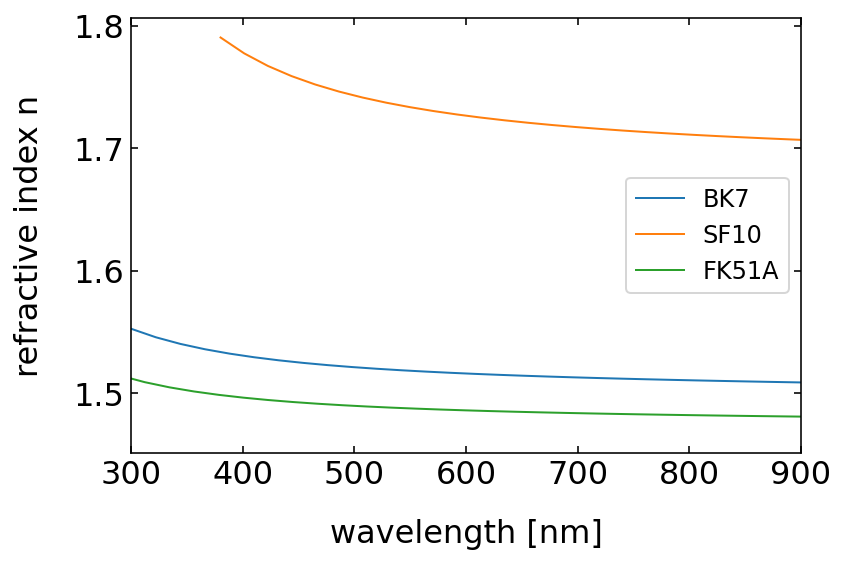

In [5]:
plt.plot(bk7.wl*1000,bk7.n,label="BK7")
plt.plot(sf10.wl*1000,sf10.n,label="SF10")
plt.plot(fk51a.wl*1000,fk51a.n,label="FK51A")
plt.xlim(300,900)
plt.xlabel("wavelength [nm]")
plt.ylabel("refractive index n")
plt.legend()
plt.show()

In [6]:
bk7=pd.read_csv("data/BK7.csv",delimiter=",")

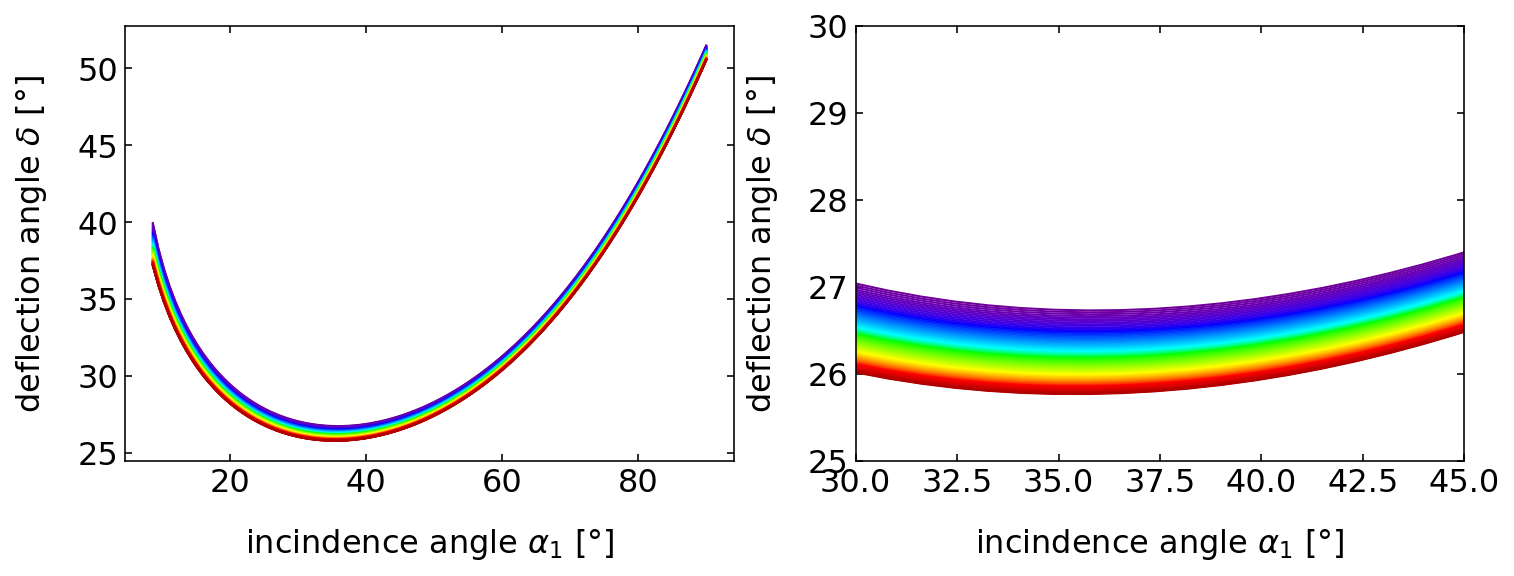

In [86]:
a_1=np.linspace(0.15,np.pi/2,100)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
for wl in np.linspace(0.400,0.700,100): 
    n1=np.interp(wl,bk7.wl,bk7.n)
    c=wavelength_to_rgb(wl*1000, gamma=0.8)
    plt.plot(a_1*180/np.pi,deflection(a_1,45,1,n1)*180/np.pi,color=c)

plt.xlabel(r"incindence angle $\alpha_1$ [°]")
plt.ylabel(r"deflection angle $\delta$ [°]")


plt.subplot(1,2,2)
for wl in np.linspace(0.400,0.700,100): 
    n1=np.interp(wl,bk7.wl,bk7.n)
    c=wavelength_to_rgb(wl*1000, gamma=0.8)
    plt.plot(a_1*180/np.pi,deflection(a_1,45,1,n1)*180/np.pi,color=c)

plt.xlabel(r"incindence angle $\alpha_1$ [°]")
plt.ylabel(r"deflection angle $\delta$ [°]")
plt.xlim(30,45)
plt.ylim(25,30)
plt.show()

The plots have a general feature, which is that the refractive index is largest at small wavelength (blue colors), while it drops continuously with increasing wavelength towards the red (800 nm). If you would characterize the dependence by the slope, i.e. $dn/d\lambda$ then all displayed curves show in the visible range 

- $\frac{dn}{d\lambda}<0$, is called normal dispersion

while

- $\frac{dn}{d\lambda}<0$, is called anomalous dispersion

This wavelength dependence of the refractive index will yield a dependence of the deflection angle on the color of light as well. The change of the deflection angle with the refractive index can be calculated to be

$$\frac{d\delta}{d n}=\frac{2\sin(\gamma/2)}{\sqrt{1-n^2\sin^2(\gamma/2)}}$$

together with the relation

$$\frac{d \delta}{d \lambda}=\frac{d\delta}{d n}\frac{d n}{d\lambda}$$

we obtain 

$$\frac{d\delta}{d\lambda}=\frac{2\sin(\gamma/2)}{\sqrt{1-n^2\sin^2(\gamma/2)}}\frac{d n}{d \lambda}$$



The refraction of white light on a prism, therefore splits the different colors composing white light spatially into a colored spectrum. Thereby the light with the longest wavelength is deflected the leats, while the one with the highest refractive index is deflected most.

<center>
    
|<img src="expimg/spectrum.png" width="49%">|
|-|
|**Fig.:** Spectrum as created by a prism in the lecture.|
    
</center>

|<img src="img/spectrum.jpeg" width="49%"> <img src="expimg/prism.png" width="49%">|
|-|
|**Fig.:** Deflection of different wavelength of light in a prism with normal dispersion.|

This dependence is very important as it enables spectroscopy, i.e. the recording of the intensity of light as a function of the wavelength. 

|<img src="img/prism_spec_principle.jpeg" width="40%"> <img src="img/prism_spectrometer.jpeg" width="40%">|
|-|
| **Fig.:** Principle and technical realization of a prism spectrometer. |

**DIY prism** 

If you don't have a prism at home, which of course most people do, you can try to create your own, by a mirror, which you dip into a water basin. Shine some white light with the flash lamp on it and observe the reflected and refracted light especially at the edges. If you want it a bit better, integrate a small aperature into a piece of black paper and put it in fornt of the flash light.

|<img src="img/diy_prism.png" width="60%">|
|-|
| **Fig.:** Home made water prism. |

The dependence of the refractive index of water on the wavelength is, however, weak. Yet, it is enough to alo show the well known colors of the rainbow. We will later refer to the colors of the rainbow. 

In [8]:
h2o=pd.read_csv("data/H2O.csv",delimiter=",")

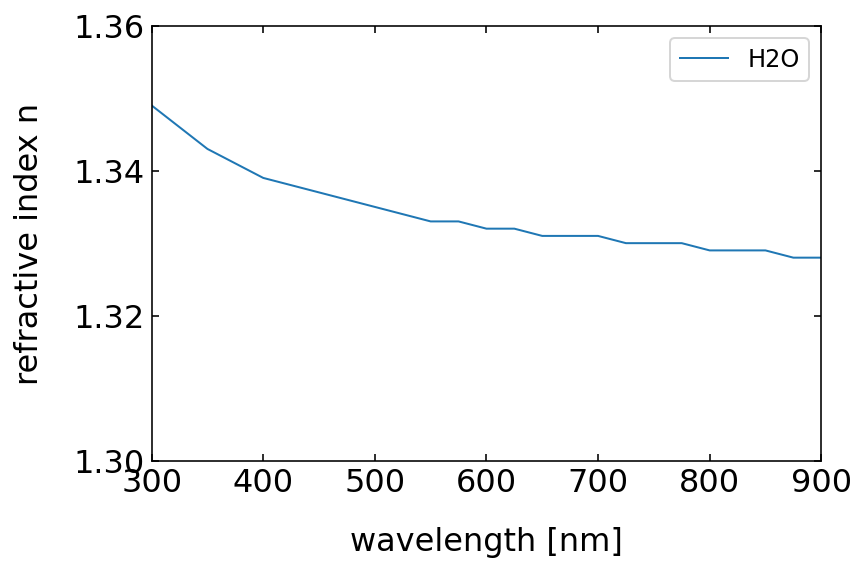

In [9]:
plt.plot(h2o.wl*1000,h2o.n,label="H2O")
plt.xlim(300,900)
plt.ylim(1.3,1.36)
plt.xlabel("wavelength [nm]")
plt.ylabel("refractive index n")
plt.legend()
plt.show()

### Lenses

The most important optical elements are lenses, which come in many different flavours. The consist of curved surfaces, which most commonly have the shape of a part of a spherical cap. It is therefoire usefult to have a look at the refraction at spherical surfaces. 

#### Refraction at spherical surfaces

For our calculations of the refraction at spherical surfaces, we consider the sketch below.  

|<img src="img/curved_surface.png" width="60%">|
|-|
|**Fig.:** Refraction at a curved surface.|

What we would like to calculate is the distance $b$ and the angle $\theta_2$ at which a ray crosses the optical axis, if it originated at a distance $a$ under an angle $\theta_1$ on the left side. This will help us to obtain an imaging equation for a lens. For the above geometry we may write down snells law as

$$n_{1}\sin(\alpha+\theta_1)=n_{2}\sin(\alpha+\theta_2)$$

In addition, we may write down a number of definitions for the angular functions, which will turn out to be useful.

- $\sin(\alpha)=\frac{y}{R}$
- $\tan(\theta_1)=\frac{y}{a}$
- $\tan(\theta_2)=\frac{y}{b}$

To find now an imaging equation, we do an approximation, which is very common in optics. This is the so called **paraxial** approximation. It assumes that all angles involved in the calculation are small, such that we can resort to the first order approaximation of the angular functions. At the end, this will yield a linearization of these function.
For small angles, we obtain

- $\sin(\theta)\approx \theta$
- $\cos(\theta)\approx 1$
- $\tan(\theta)=\frac{\sin(\theta)}{\cos(\theta)}\approx \theta$

With the help of these approximations we can write Snells law for the curved surface as

$$n_1(\alpha+\theta_1)=n_2(\alpha-\theta_2)$$

With some slight transformation which you will find in the video of the online lecture we obtain therefore

$$\theta_2=\frac{n_2-n_1}{n_2 R}y -\frac{n_1}{n_2}\theta_1$$

which is a purely linear equation in $y$ and $\theta_1$.

Lets now assume light is coming form a point a distance $y$ from the optical axis and there is a ray travelling parallel to the optical axis hitting the spherical surface at $y$, while a second ray is incident for $y=0$.

|<img src="img/image_curved.png" width="60%">|
|-|
|**Fig.:** Image formation at a curved surface.|

We may apply our obatined formula for the two cases. 


$\theta_1=0$:

$$\theta_2=\frac{n_2-n_1}{n_2}\frac{y}{R}$$
$$\theta_2=\frac{y+\Delta y}{b}$$

and thus

$$\frac{y+\Delta y}{b}=\frac{n_2-n_1}{n_2}\frac{y}{R}$$

$y=0$:

$$n_2\frac{\Delta y}{b}=n_1\frac{y}{a}$$


Combining both equations yields

$$\frac{n_1}{a}+\frac{n_2}{b}=\frac{n_2-n_1}{ R}$$

where we define the new quantity **focal length** which only depends on the properties of the curved surface

$$f=\frac{n_2}{n_2-n_1}R$$

<div class="alert alert-info">

**Imaging Equation Spherical Refracting Surface**
    
The sum of the inverse object and image distances equals the inverse focal length of the spherical refracting surface

$$\frac{n_1}{g}+\frac{n_2}{b}\approx\frac{n_2}{f}$$
    
where the focal length of the refracting surface is given by
    
$$f=\frac{n_2}{n_2-n_1}R$$

in the parixial approximation.
</div>

#### Refraction with two spherical surfaces

In our previous calculation we have found a linear relation for between the incident angle $\theta_1$ with the optical axis, the incident height of the ray $y$ and the outgoing angle $\theta_2$.

$$\theta_2=\frac{n_2-n_1}{n_2 R_1}y -\frac{n_1}{n_2}\theta_1$$

Remember that the refractive index $n_1$ is the one of the medium from where we enter the lens with a refractive index $n_2$. The radius of the first spherical surface is $R_1$. For a lens as displayed below, we have to consider now a second refraction, where we take the outgoing angle of the first refraction as the incident angle and we have to reverse the use of the refractive indices. The radius of the second spherical surface is now $R_2$ and its value will turn out to be negative as the curvature with respect to the optical axis has reversed. 


|<img src="img/thin_lens.png" width="40%">|
|-|
|**Fig.:** Refraction on two spherical surfaces.|

When applying our equation a second time, we also need the second height $y^{\prime}$ for the calculation. For a **thin lens**, we now have a thickness $d<<R_1, R_2$ much smaller than the radii of the spherical surfaces. From that we may assume that $y\approx y^{\prime}$.

The result of the calculation is leading to the imaging equation for the thin lens.

<div class="alert alert-info">

**Imaging Equation Thin Lens**
    
The sum of the inverse object and image distances equals the inverse focal length of the thin lens

$$\frac{1}{a}+\frac{1}{b}\approx\frac{n_2-n_1}{n_1}\left (\frac{1}{R_1}-\frac{1}{R_2}\right )=\frac{1}{f}$$
    
where the focal length of the thin lens is given by
    
$$f=\frac{n_1}{n_2-n_1}\left ( \frac{R_1 R_2}{R_2 -R_1}\right)$$

in the parixial approximation.
</div>

The equation for the focal length has some important consequence. It says that if the difference of the refractive indices inside ($n_2$) and outside $n_1$ get smaller the focal length becomes larger an finally infinity. This can be nicely observed by placing a lens outside and inside a water filled basin as shown below.

|<img src="expimg/lens_contrast_out.png" width="40%"> <img src="expimg/lens_contrast_in.png" width="40%">|
|-|
|**Fig.:** Focusing of parallel rays by a lens in air ($n_1=1$, left) and in water ($n_1=1.36$, right). The images clearly show the change in focal length between the two situations.|

|<img src="img/thin_lens_imaging.png" width="40%">|
|-|
|**Fig.:** Image construction on a thin lens.|

Similar to the concave mirror, we may now also find out the the image size or the magnification of the lens.
The magnification is given by 

$$M=\frac{h_{\rm image}}{h_{\rm object}}=-\frac{b}{a}=\frac{f}{f-a}$$

According to our previous consideration $M<0$ corresponds to a reversed image, while its upright as the object for $M>0$. We therefore easily see the following:

- for $a<f$ the image is upright and magnified (image is virtual however)
- for $a>f$ the image is always reversed (image is real)
- for $2f>a>f$ the image is magnified 
- for $a>2f$ the image is shrinked
- for $a=f$ the image appears at infinity with $M=\infty$


Depending on the radii of curvature and their sign, one can now construct different types of lenses, that are used in many applications. Modern microscopy lenses, for example, contain sometimes upt to 20 different lenses with 

|<img src="img/lens_types.png" width="40%">|
|-|
|**Fig.:** Different lens types.|

|<img src="expimg/convex_plane_thick.png" width="32%"> <img src="expimg/convex_plane_thin.png" width="32%"> <img src="expimg/bi-concave_lens.png" width="32%">|
|-|
|**Fig.:** Focusing behavior of a few different lens types.|